<style>
    pre {
        white-space: pre-wrap;
        word-wrap: break-word;
    }
</style>

<div style="display:flex; justify-content:space-around; align-items:center; background-color:#cccccc; padding:5px; border:2px solid #333333;">
    <a href="https://estudios.upct.es/grado/5251/inicio" target="_blank">
    <img src="https://www.upct.es/contenido/universidad/galeria/identidad-2021/logos/logos-upct/marca-upct/marca-principal/horizontal/azul.png" alt="UPCT" style="height:145px; width:auto;">
    <a href="https://www.um.es/web/estudios/grados/ciencia-ingenieria-datos/" target="_blank">
    <img src="https://www.um.es/documents/1073494/42130150/LogosimboloUMU-positivo.png" alt="UMU" style="height:200px; width:auto;">
</div>

# Asignatura: **Deep Learning**

## Titulación: **Grado en Ciencia e Ingeniería de Datos**

## Práctica 1: Introducción al Deep Learning
### **Sesión 1/3: Implementación de modelos de aprendizaje automático**

**Autores**: Juan Morales Sánchez, Antonio Martínez Sánchez, José Luís Sancho Gómez y Juan Antonio Botía Blaya

___

### Objetivos

- Familiarización con TensorFlow y Python para *Deep Learning*
- Manipulación de datos con tensores
- Diseño y configuración de modelos supervisados
- Entrenamiento y evaluación de modelos

### Contenidos
- [Entorno de trabajo](#entorno)
- [Marcos para aprendizaje profundo](#librerias)
- [Aprendizaje supervisado](#aprendizaje)
- [Tensores y manipulación de datos](#tensores)
- [La arquitectura de red](#arquitectura)
- [Entrenamiento del modelo](#entrenamiento)
- [Inferencia o predicciones del modelo](#inferencia)
- [Ejercicios](#ejercicios)

### Bibliografía
- [Deep Learning with Python (segunda edición)](https://www.manning.com/books/deep-learning-with-python-second-edition)
- [Dive into Deep Learning](https://d2l.ai/)

### Requisitos
<a class='anchor' id='requisitos'></a>

- [Numpy](https://pypi.org/project/numpy/) (computación numérica)
- [Scipy](https://pypi.org/project/scipy/) (computación científica)
- [Scikit-learn](https://pypi.org/project/scikit-learn/) (*Machine Learning*)
- [Scikit-image](https://pypi.org/project/scikit-image/) (*Image Processing*)
- [Matplotlib](https://pypi.org/project/matplotlib/) y [Seaborn](https://pypi.org/project/seaborn/) (visualización de datos)
- [Tensorflow](https://www.tensorflow.org/) 2.x que incluye a [Keras](https://www.tensorflow.org/guide/keras) 2.x (*Deep Learning*)



<div style="page-break-before: always;"></div>

<a class='anchor' id='entorno'></a>

## Entorno de trabajo

Se trabajará con notebooks de [Jupyter](https://jupyter.org/install) con código Python empleando como intérprete la última versión de [Miniconda](https://docs.anaconda.com/miniconda/). A continuación se enumeran los pasos a seguir para configurar un entorno virtual de Python adecuado.

### Microconda + Visual Studio Code

Para instalar miniconda:
1. Accede al [repositorio de miniconda](https://repo.anaconda.com/miniconda/).
2. Descarga e instala la última version (*latest*) disponible para tu sistema operativo.

Para instalar Visual Studio Code:
1. Descarga e instala VS Code desde [su sitio web oficial](https://code.visualstudio.com/download).
2. Instala las extensiones de Python y Jupyter desde VS Code.

### Configuración del entorno virtual
1. Abre un nuevo terminal en tu sistema operativo (Linux, Windows o macOS).

2. OPCIÓN 1: Crea un nuevo entorno virtual e instala paquetes desde repositorio de ``conda``:
   ```bash
   conda create --name dl --channel defaults python=3.9
   conda activate dl
   conda install numpy scipy scikit-learn scikit-image matplotlib seaborn mrcfile ipykernel tensorflow
   ```

2. OPCIÓN 2: Crea un nuevo entorno virtual e instala paquetes desde repositorio de ``pip`` (preferible si su equipo dispone de una GPU Nvidia):
   ```bash
   conda create --name dl --channel defaults python=3.9 pip
   conda activate dl
   pip install numpy scipy scikit-learn scikit-image matplotlib seaborn mrcfile ipykernel tensorflow[and-cuda]
   ```

3. Para gestionar el entorno, puedes desactivarlo y opcionalmente eliminarlo:
   ```bash
   conda deactivate
   conda env remove --name dl --all
   ```



*Nota: Tenga en cuenta que [TensorFlow 2.10](https://www.tensorflow.org/install/pip#windows-native) es la última versión de TensorFlow que admite GPU en Windows nativo. A partir de [TensorFlow 2.11](https://www.tensorflow.org/install/pip#windows-wsl2) para utilizar GPU en Windows es necesario instalar TensorFlow sobre WSL2.*


<a class='anchor' id='librerias'></a>

## Marcos para aprendizaje profundo

En la práctica las librerías de código abierto para la construcción y entrenamiento de modelos de aprendizaje profundo resultan ideales para implementar redes neuronales y procesar datos complejos como imágenes y texto.

A continuación se resumen en una tabla comparativa las características de las 3 principales iniciativas o marcos de cómputo para *Deep Learning* que cumplen estos requisitos, y que actualmente concentran más de 90% del desarrollo en este campo: [PyTorch](https://pytorch.org/), [TensorFlow](https://www.tensorflow.org/) y [JAX](https://github.com/google/jax).

| Aspecto            | [JAX](https://github.com/google/jax)                                                                                                                                         | [TensorFlow](https://www.tensorflow.org/)                                                                                                                                              | [PyTorch](https://pytorch.org/)                                                                                                                                          |
|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Origen**         | Desarrollado por [Google Research](https://research.google/) (inspirado en [Autograd](https://github.com/HIPS/autograd))                                                                                           | Creado y mantenido por [Google Brain](https://ai.google/research/teams/brain/) (incluye componentes como [Keras](https://keras.io), [TFLite](https://www.tensorflow.org/lite), [TensorFlow.js](https://www.tensorflow.org/js), etc.) | Desarrollado por [Meta AI](https://ai.facebook.com/) (anteriormente Facebook), con apoyo de la comunidad de [GitHub](https://github.com/pytorch/pytorch)                                                       |
| **Paradigma**      | Estilo funcional: usa transformaciones como [`jit`](https://jax.readthedocs.io/en/latest/jax.html#jax.jit), [`grad`](https://jax.readthedocs.io/en/latest/jax.html#jax.grad), [`vmap`](https://jax.readthedocs.io/en/latest/jax.html#jax.vmap), etc., sobre sintaxis parecida a [NumPy](https://numpy.org/). | Ejecución imperativa por defecto ([Eager Execution](https://www.tensorflow.org/guide/eager)) y optimizaciones basadas en grafos internos (p. ej., [XLA](https://openxla.org/)).                                 | Ejecución imperativa (dinámica), muy similar a la programación en Python nativo.                                                                                                                               |
| **Curva de aprendizaje**   | Moderada: sintaxis de [NumPy](https://numpy.org/) es familiar, pero el paradigma funcional (p. ej., `jit`, `vmap`) puede requerir un cambio de mentalidad.                                                            | Bastante accesible gracias a la integración con [Keras](https://keras.io). En casos avanzados, se puede profundizar en niveles de API más bajos (por ej., `tf.*` a bajo nivel).                                               | Normalmente considerada sencilla, útil para prototipado rápido y depuración, gracias a la ejecución imperativa paso a paso.                                                                                   |
| **Rendimiento**    | Muy alto en [GPU](https://developer.nvidia.com/cuda-toolkit) y [TPU](https://cloud.google.com/tpu) gracias a la integración con [XLA](https://openxla.org/).                                                                                            | Excelente rendimiento en GPU y TPU; TensorFlow se integra con [XLA](https://openxla.org/) y ofrece muchas optimizaciones para despliegue en producción ([TensorFlow Serving](https://www.tensorflow.org/tfx/guide/serving), etc.). | Muy buen rendimiento en GPU ([CUDA](https://developer.nvidia.com/cuda-toolkit)). Soporte limitado para TPU (existen iniciativas de la comunidad, pero no un soporte oficial completo).                          |
| **Ventajas**       | - Control granular sobre transformaciones y compilación<br>- Sintaxis similar a [NumPy](https://numpy.org/)<br>- Integración potente en [TPU](https://cloud.google.com/tpu).                                       | - Amplio ecosistema ([Keras](https://keras.io), [TFLite](https://www.tensorflow.org/lite), [TensorFlow Serving](https://www.tensorflow.org/tfx/guide/serving), [TensorFlow.js](https://www.tensorflow.org/js), etc.)<br>- Respaldo empresarial<br>- Facilidad de despliegue | - Flujo imperativo muy intuitivo<br>- Amplia adopción en investigación (especialmente en visión, NLP, etc.)<br>- Gran cantidad de ejemplos y repositorios de la comunidad                                      |
| **Desventajas**    | - Ecosistema más pequeño que PyTorch/TensorFlow<br>- El enfoque funcional no es tan común y puede ser menos intuitivo para principiantes                                                                            | - Puede ser abrumador por la gran cantidad de documentación y APIs<br>- A veces requiere atención a la versión y a la configuración de entornos (GPU/TPU)                                                                       | - No siempre tan optimizado como TensorFlow en escenarios de producción a gran escala<br>- Soporte oficial para TPU inexistente o muy limitado                                                                 |
| **Comunidad y recursos**      | En crecimiento, con proyectos recientes en [GitHub](https://github.com/google/jax) y foros especializados, aunque menor que las de TensorFlow/PyTorch.                                                               | Muy grande, con abundantes recursos de aprendizaje (foros, cursos, documentación oficial, etc.).                                                                                       | Muy activa y enfocada en investigación; gran cantidad de *repos* y tutoriales en [GitHub](https://github.com/pytorch).                                                                                       |


En conclusión, se puede afirmar que [PyTorch](https://pytorch.org/) y [TensorFlow](https://www.tensorflow.org/) son hoy por hoy los marcos más utilizadas para *Deep Learning* por diferentes motivos, mientras que [JAX](https://github.com/google/jax) se está abriendo paso especialmente en investigación y proyectos que busquen optimizaciones avanzadas mediante XLA.

En las prácticas de esta asignatura nos utilizaremos [TensorFlow](https://www.tensorflow.org/), al considerar que el interfaz de integrado de [Keras](https://keras.io) ofrece la alternativa más accesible para un primer contacto con la implmentación de modelos de aprendizaje automático. Y a largo plazo también parece ofrecer una visión más amplia y completa de posibilidades y usos dentro del ámbito académico y profesional. La experiencia adquirida debería permitir una fácil adaptación a otros entornos como [PyTorch](https://pytorch.org/), e incluso una migración e código bastante directa.




<a class='anchor' id='aprendizaje'></a>

## Aprendizaje supervisado

El **aprendizaje supervisado** constituye una categoría del aprendizaje automático en la cual se enseña a un modelo a realizar predicciones o clasificaciones basándose en un conjunto de datos etiquetados. Este tipo de aprendizaje se denomina "supervisado" porque el proceso de entrenamiento está guiado por una supervisión explícita a través de etiquetas que indican las respuestas correctas.

### Tipos de Aprendizaje Supervisado
1. **Regresión**: <a class='anchor' id='regresion'></a>
   - El objetivo es predecir valores continuos.
   - Ejemplo: Predecir el precio de una vivienda en función de sus características.

2. **Clasificación**: <a class='anchor' id='clasificacion'></a>
   - El objetivo es asignar categorías a las entradas.
   - Ejemplo: Clasificar correos electrónicos como "spam" o "no spam".

### Componentes del aprendizaje supervisado
1. **Datos de entrenamiento**: <a class='anchor' id='datos'></a>
   - Conjunto de ejemplos que incluyen:
     - **Entradas** \(X\): Características o variables independientes.
     - **Etiquetas** \(Y\): Salidas esperadas o variables dependientes (valores conocidos).

2. **Modelo**: <a class='anchor' id='modelo'></a>
   - Una función  f\(X\) que el sistema entrena para aproximar la relación entre X y Y.

3. **Coste o pérdida (error)**: <a class='anchor' id='coste'></a>
   - Una métrica que evalúa lo bien que las predicciones del modelo coinciden con las etiquetas reales.

4. **Optimización**: <a class='anchor' id='optimizacion'></a>
   - Proceso de ajuste de los parámetros del modelo para minimizar la pérdida mediante algoritmos como el descenso estocástico de gradiente.




In [1]:
#### Cargando el conjunto de datos MNIST
import numpy as np
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Atributos clave de un conjunto de datos: rango, dimensiones y tipo

In [2]:
print("Rango del tensor del conjunto de entrenamiento:\n", train_images.ndim)
print("Dimensiones del conjunto de entrenamiento [samples x height x width]:\n", train_images.shape)
print("Número de etiquetas del conjunto de entrenamiento:\n", len(train_labels))
print("Tipo del conjunto de entrenamiento:\n", type(train_images), train_images.dtype)
print("Tipo de las etiquetas de entrenamiento:\n", type(train_labels), train_labels.dtype)
print("Rango dinánico de valores del conjunto de entrenamiento:\n", [np.min(train_images), np.max(train_images)])
print("Valores de las etiquetas de entrenamiento:\n", np.unique(train_labels))

print("Rango del tensor del conjunto de test:\n", test_images.ndim)
print("Dimensiones del conjunto de test [samples x height x width]:\n", test_images.shape)
print("Número de etiquetas del conjunto de test:\n", len(test_labels))
print("Tipo del conjunto de test:\n", type(test_images), test_images.dtype)
print("Tipo de las etiquetas de test:\n", type(test_labels), test_labels.dtype)
print("Rango dinánico de valores del conjunto de entrenamiento:\n", [np.min(test_images), np.max(test_images)])
print("Valores de las etiquetas de entrenamiento:\n", np.unique(test_labels))

Rango del tensor del conjunto de entrenamiento:
 3
Dimensiones del conjunto de entrenamiento [samples x height x width]:
 (60000, 28, 28)
Número de etiquetas del conjunto de entrenamiento:
 60000
Tipo del conjunto de entrenamiento:
 <class 'numpy.ndarray'> uint8
Tipo de las etiquetas de entrenamiento:
 <class 'numpy.ndarray'> uint8
Rango dinánico de valores del conjunto de entrenamiento:
 [0, 255]
Valores de las etiquetas de entrenamiento:
 [0 1 2 3 4 5 6 7 8 9]
Rango del tensor del conjunto de test:
 3
Dimensiones del conjunto de test [samples x height x width]:
 (10000, 28, 28)
Número de etiquetas del conjunto de test:
 10000
Tipo del conjunto de test:
 <class 'numpy.ndarray'> uint8
Tipo de las etiquetas de test:
 <class 'numpy.ndarray'> uint8
Rango dinánico de valores del conjunto de entrenamiento:
 [0, 255]
Valores de las etiquetas de entrenamiento:
 [0 1 2 3 4 5 6 7 8 9]


### Visualización de datos y etiquetas

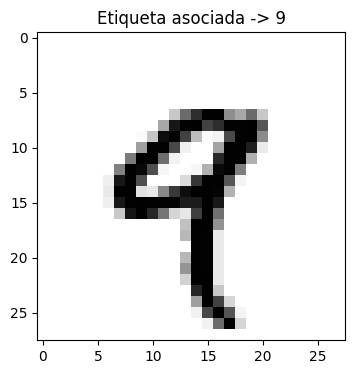

In [3]:
#### Visualizando el quinta muestra del conjunto de imágenes y su etiqueta asociada
import matplotlib.pyplot as plt
digit = train_images[4]
plt.figure(figsize=(5, 4))
plt.imshow(digit, cmap=plt.cm.binary)
plt.title(f"Etiqueta asociada -> {train_labels[4]}")
plt.show()

### Acondicionaniento de datos

El **acondicionamiento de datos** es una etapa fundamental en el flujo de trabajo del aprendizaje automático y redes neuronales en general. Consiste en preparar los datos para que sean compatibles con los modelos y para mejorar el rendimiento y estabilidad del entrenamiento. Esta preparación incluye varias operaciones que ajustan los datos a los formatos, rangos o estructuras requeridas. Entre las operaciones típicas que podemos englobar dentro de esta categoría se encuentran habitualmente:

1. **Normalización de datos**:
   - Escalar los valores de las características a un rango común, como [0, 1] ó [-1, 1].
   - Ejemplo: Dividir los valores de píxel de imágenes (en el rango 0-255) por 255 para normalizarlos entre [0, 1].
   - Beneficio:
     - Mejora la estabilidad del modelo.
     - Acelera la convergencia durante el entrenamiento.

2. **Aplanamiento de dimensiones**:
   - Transformar datos multidimensionales en vectores unidimensionales.
   - Ejemplo: Imágenes 2D (28x28 píxeles) a un vector de 784 elementos para alimentarlas en capas densas.
   - Beneficio:
     - Permite la entrada de datos a modelos que requieren estructuras lineales.

3. **Conversión de tipo de datos**:
   - Cambiar el tipo de los datos o las etiquetas, como de enteros (`int`, `uint`) a coma flotante (`float`).
   - Ejemplo: Convertir etiquetas categóricas a `float32` para cálculos numéricos.
   - Beneficio:
     - Asegura compatibilidad con el diseño del modelo.




In [4]:
train_images = train_images.reshape((60000, 28 * 28))  # Aplanamiento
train_images = train_images.astype("float32") / 255  # Normalización + tipo flotante
test_images = test_images.reshape((10000, 28 * 28))  # Aplanamiento
test_images = test_images.astype("float32") / 255  # Normalización + tipo flotante

print("Rango del tensor del conjunto de entrenamiento:\n", train_images.ndim)
print("Dimensiones del conjunto de entrenamiento [samples x height x width]:\n", train_images.shape)
print("Número de etiquetas del conjunto de entrenamiento:\n", len(train_labels))
print("Tipo del conjunto de entrenamiento:\n", type(train_images), train_images.dtype)
print("Tipo de las etiquetas de entrenamiento:\n", type(train_labels), train_labels.dtype)
print("Rango dinánico de valores del conjunto de entrenamiento:\n", [np.min(train_images), np.max(train_images)])
print("Valores de las etiquetas de entrenamiento:\n", np.unique(train_labels))

print("Rango del tensor del conjunto de test:\n", test_images.ndim)
print("Dimensiones del conjunto de test [samples x height x width]:\n", test_images.shape)
print("Número de etiquetas del conjunto de test:\n", len(test_labels))
print("Tipo del conjunto de test:\n", type(test_images), test_images.dtype)
print("Tipo de las etiquetas de test:\n", type(test_labels), test_labels.dtype)
print("Rango dinánico de valores del conjunto de entrenamiento:\n", [np.min(test_images), np.max(test_images)])
print("Valores de las etiquetas de entrenamiento:\n", np.unique(test_labels))

Rango del tensor del conjunto de entrenamiento:
 2
Dimensiones del conjunto de entrenamiento [samples x height x width]:
 (60000, 784)
Número de etiquetas del conjunto de entrenamiento:
 60000
Tipo del conjunto de entrenamiento:
 <class 'numpy.ndarray'> float32
Tipo de las etiquetas de entrenamiento:
 <class 'numpy.ndarray'> uint8
Rango dinánico de valores del conjunto de entrenamiento:
 [0.0, 1.0]
Valores de las etiquetas de entrenamiento:
 [0 1 2 3 4 5 6 7 8 9]
Rango del tensor del conjunto de test:
 2
Dimensiones del conjunto de test [samples x height x width]:
 (10000, 784)
Número de etiquetas del conjunto de test:
 10000
Tipo del conjunto de test:
 <class 'numpy.ndarray'> float32
Tipo de las etiquetas de test:
 <class 'numpy.ndarray'> uint8
Rango dinánico de valores del conjunto de entrenamiento:
 [0.0, 1.0]
Valores de las etiquetas de entrenamiento:
 [0 1 2 3 4 5 6 7 8 9]


### Noción de lote de datos

Recordemos en primer lugar que una **época** es un ciclo completo en el que el modelo procesa todo el conjunto de datos de entrenamiento una vez. Durante una época, el modelo utiliza todos los ejemplos del conjunto de datos para calcular los gradientes y ajustar los pesos. Por otra parte, y a lo largo de cada época, un **lote de datos** (*batch*) es un subconjunto del conjunto de datos de entrenamiento que el modelo procesa en cada iteración del entrenamiento.

Por tanto, en lugar de procesar todos los datos de entrenamiento de una vez en cada época, se dividen en pequeños grupos (lotes), y el modelo ajusta sus parámetros utilizando únicamente los datos del lote actual (*Mini-Batch Training*). Algunas de las ventajas del uso de lotes de datos son:

1. **Eficiencia computacional**:
   - Procesar datos en lotes aprovecha la computación paralela de GPUs/TPUs.
2. **Mejor estimación del gradiente**:
   - Mini-batches ofrecen un compromiso entre ruido y precisión en el cálculo del gradiente.
3. **Eficiencia del uso de memoria**:
   - Los lotes permiten entrenar con conjuntos de datos grandes sin necesidad de cargar todo el conjunto en memoria.

In [5]:
n = 3 # lote número 3
batch_size = 128 # tamaño del lote
batch = train_images[batch_size * n:batch_size * (n + 1)]
label_batch = train_labels[batch_size * n:batch_size * (n + 1)]
print("Dimensiones del lote de datos [samples x length]:\n", batch.shape)
print("Dimensiones del lote de etiquetas [samples]:\n", len(label_batch))

Dimensiones del lote de datos [samples x length]:
 (128, 784)
Dimensiones del lote de etiquetas [samples]:
 128


<a class='anchor' id='arquitectura'></a>

## La arquitectura de red

La **arquitectura de red** refleja la estructura y diseño de una red neuronal, incluyendo las capas, cómo están conectadas, los tipos de operaciones que realizan y los hiperparámetros asociados. Es una especificación que define cómo se organiza la red para procesar datos y alcanzar predicciones.

La arquitectura influye directamente en la capacidad del modelo para aprender patrones de los datos. Elegir la arquitectura correcta es el primer requisito para un buen rendimiento del modelo y su capacidad de generalización. Algunos componentes claves de la arquitectura de red son:

1. **Capas**:
   - Agrupación de operaciones de un determinado tipo, que transforman los datos desde la entrada hasta la salida.
   - Ejemplo:
     - Capas densas (*fully connected*).
     - Capas convolucionales (*convolutional layers*).
     - Capas recurrentes (*recurrent layers*).

2. **Neuronas por capa**:
   - El número de neuronas determina la capacidad de cada capa para reconocer patrones. El número de capas y la cantidad de neuronas de cada capa determina el número total de parámetros o pesos entrenables del modelo.

3. **Funciones de activación**:
   - Introducen no linealidades para que la red pueda aprender relaciones complejas.
   - Ejemplo: `ReLU`, `sigmoid`, `tanh`.

4. **Conexiones entre capas**:
   - Puede fluir solo hacía delante (*feedforward*) o incluir retroalimentación (como en redes recurrentes).

5. **Hiperparámetros**:
   - Aspectos configurables de la red, como el número de capas, tamaño del lote, tasa de aprendizaje, etc.


Existen varias formas de definir la arquitectura de un modelo de aprendizaje automático en TensorFlow:

In [6]:
# Definición secuencial (opción 1)
from tensorflow import keras
from tensorflow.keras import layers, Sequential, Model
model = Sequential([
    layers.Dense(512, activation="relu", input_shape=(28 * 28, )), # capa oculta
    layers.Dense(10, activation="softmax") # capa de salida
])
model.summary()

# Definición secuencial (opción 2)
model = Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28, ))) # capa oculta
model.add(layers.Dense(10, activation="softmax")) # capa de salida
model.summary()

# Definición funcional
input_layer = layers.Input(shape=(28 * 28, ))  # Capa de entrada
hidden_layer = layers.Dense(512, activation="relu")(input_layer)  # Capa oculta
output_layer = layers.Dense(10, activation="softmax")(hidden_layer)  # Capa de salida
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Observa que con una definición ``Sequential`` del modelo la ``InputLayer`` no aparece en el resumen, incluso si se incluye explícitamente. En ``Functional``, siempre aparece porque la entrada es explícita como parte del diseño del modelo. Esto sucede porque en el flujo típico de ``Sequential`` la capa de entrada se infiere automáticamente a partir de los datos proporcionados en la primera capa, y no se considera como una capa separada en el grafo de computación, si no como parte del flujo de datos implícito, lo cual es más simple y resulta óptimo para arquitecturas convencionales, en particular aquellas que tienen una sola entrada.

### Configurar el modelo para el aprendizaje

La configuración y compilación del modelo conlleva definir las siguientes componentes claves:

   - **Función de coste o pérdida**:
     - Establece una métrica para valorar lo bien/mal que está prediciendo el modelo.
     - Ejemplo: `mean squared error` para regresión, `categorical crossentropy` para clasificación.
   - **Optimizador**:
     - Algoritmo que ajusta los parámetros del modelo para minimizar la pérdida.
     - Ejemplo: `Adam`, `SGD`.
   - **Métricas adicionales**:
     - Evalúan las prestaciones del modelo durante el entrenamiento y la validación.
     - Ejemplo: precisión (`accuracy`), error absoluto medio (`MAE`).


In [7]:
model.compile(
    optimizer='rmsprop',                       # Optimizador
    loss='sparse_categorical_crossentropy',    # Función de pérdida
    metrics=['accuracy']                       # Métrica
)

<a class='anchor' id='entrenamiento'></a>

## Entrenamiento del modelo

El método `fit` de TensorFlow es una función fundamental en la API de Keras que entrena un modelo de aprendizaje profundo utilizando un conjunto de datos. Este método ejecuta el proceso de entrenamiento, integrando todas las fases necesarias: cálculo de pérdidas, optimización, y evaluación de métricas.

Al llamar al método `fit`, TensorFlow sigue estos pasos:

1. **Preparación del entrenamiento**:
   - Verifica que el modelo esté correctamente compilado con:
     - Una función de pérdida (`loss`).
     - Un optimizador (`optimizer`).
     - Opcionalmente, métricas (`metrics`) para evaluar las prestaciones.

2. **Procesamiento de los datos**:
   - Divide los datos en lotes según el tamaño definido en `batch_size`.
   - Si se emplea validación, separa una parte de los datos para evaluación.

3. **Bucle de entrenamiento**:
   Para cada época:
   - **Paso hacia adelante (*forward pass*)**:
     - Calcula las predicciones del modelo para un lote de datos.
   - **Cálculo de la pérdida**:
     - Compara las predicciones con las etiquetas reales usando la función de pérdida.
   - **Paso hacia atrás (*backward pass*)**:
     - Calcula los gradientes de los parámetros del modelo con respecto a la pérdida.
   - **Actualización de los pesos**:
     - Ajusta los pesos del modelo utilizando el optimizador configurado.

4. **Validación (opcional)**:
   - Al final de cada época, evalúa el modelo en el conjunto de validación.

5. **Almacenamiento de resultados**:
   - Guarda métricas como la pérdida y otras definidas en `metrics` para cada época.

El método `fit` devuelve un histórico (objeto `history`) que contiene un registro de las prestaciones del modelo durante el entrenamiento, mediante un diccionario con las métricas por época (`loss`, `mae`, `val_loss`, etc.). Además `fit` es compatible con `callbacks` para personalizar y extender el entrenamiento.

In [8]:
history = model.fit(
    train_images, train_labels, # datos y etiquetas de entrenamiento
    epochs=5,               # Número de épocas
    batch_size=64           # Tamaño del lote
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8932 - loss: 0.3659
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9712 - loss: 0.0959
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9822 - loss: 0.0587
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9866 - loss: 0.0434
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9910 - loss: 0.0294


<a class='anchor' id='inferencia'></a>

## Inferencia o predicciones del modelo

El método `predict` de TensorFlow en la API de Keras se utiliza para realizar **inferencia** con un modelo ya entrenado. Es decir, genera predicciones a partir de nuevos datos de entrada, aplicando únicamente la fase de **propagación hacia adelante** (*forward pass*), sin actualizar los pesos del modelo, es decir realiza los siguientes pasos:

1. **Propagación hacia adelante**:
   - Toma los datos de entrada y los pasa a través de las capas del modelo.
   - Realiza todas las operaciones definidas en el modelo, como multiplicaciones de tensores, funciones de activación y normalización.

2. **Cálculo de las salidas**:
   - Produce una salida en función de las configuraciones del modelo:
     - Para problemas de regresión, devuelve valores continuos: el valor estimado por el modelo basado en los datos de entrada.
     - Para problemas de clasificación, devuelve probabilidades de cada clase (si la última capa es una función `softmax`). Normalmente se elige la clase con mayor probabilidad para obtener las clases predichas (`np.argmax(y_pred, axis=-1)`).

3. **Agrupación en lotes (opcional)**:
   - Divide los datos en lotes si el conjunto de datos es grande, para optimizar el uso de memoria.


In [9]:
test_digits = test_images[0:20]
predictions = model.predict(test_digits) # probabilidades de clase (one hot encoding)
predictions = predictions.argmax(axis=-1) # clase de mayor probabilidad

for i, pred in enumerate(predictions):
    print(f"Etiqueta: {test_labels[i]}, Predicción: {pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Etiqueta: 7, Predicción: 7
Etiqueta: 2, Predicción: 2
Etiqueta: 1, Predicción: 1
Etiqueta: 0, Predicción: 0
Etiqueta: 4, Predicción: 4
Etiqueta: 1, Predicción: 1
Etiqueta: 4, Predicción: 4
Etiqueta: 9, Predicción: 9
Etiqueta: 5, Predicción: 5
Etiqueta: 9, Predicción: 9
Etiqueta: 0, Predicción: 0
Etiqueta: 6, Predicción: 6
Etiqueta: 9, Predicción: 9
Etiqueta: 0, Predicción: 0
Etiqueta: 1, Predicción: 1
Etiqueta: 5, Predicción: 5
Etiqueta: 9, Predicción: 9
Etiqueta: 7, Predicción: 7
Etiqueta: 3, Predicción: 3
Etiqueta: 4, Predicción: 4


<a class='anchor' id='evaluacion'></a>

### Evaluación del modelo

La función `evaluate` de TensorFlow en la API de Keras evalúa el modelo entrenado en un conjunto de datos específico, calculando la pérdida y las métricas definidas durante la compilación del modelo. Es una forma de medir el rendimiento del modelo, ya sea en datos de validación o de test, sin modificar los parámetros del modelo. Conlleva la siguiente secuencia:

1. **Propagación hacia adelante (*forward pass*)**:
   - Pasa los datos de entrada a través del modelo para generar predicciones.

2. **Cálculo de la pérdida**:
   - Compara las predicciones con las etiquetas reales utilizando la función de pérdida definida.

3. **Cálculo de métricas**:
   - Evalúa las métricas configuradas al compilar el modelo, como precisión, MAE, etc.

4. **Agrupación en lotes (opcional)**:
   - Si el conjunto de datos es grande, divide los datos en lotes para optimizar el uso de memoria.

5. **Promedio de resultados**:
   - Calcula la pérdida y las métricas promedio en todos los lotes.

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0916
test_acc: 0.9792


<a class='anchor' id='ejercicios'></a>

## Ejercicios

**E1:** Crear un modelo de clasificación binaria para predecir si la suma de dos números es mayor a 1 usando un conjunto de datos sintético.

   - Se generan 1000 muestras con dos características cada una (`x_data`).
   - La etiqueta (`y_data`) es `1` si la suma de las dos características es mayor que 1, y `0` en caso contrario.
      - Ejemplo:
         - Entrada: `[0.6, 0.7]` → Suma: `1.3` → Etiqueta: `1`.
         - Entrada: `[0.3, 0.2]` → Suma: `0.5` → Etiqueta: `0`.

   - Se divide el conjunto en entrenamiento (80%) y prueba (20%).

   - Construir una red neuronal con dos capas:
     - Capa oculta: 64 neuronas y función de activación `relu`.
     - Capa de salida: 1 neurona con activación `sigmoid` para obtener una probabilidad entre 0 y 1 (para clasificación binaria).

   - Optimizador: `adam`, que ajusta los pesos durante el entrenamiento.
   - Pérdida: `binary_crossentropy`, que es adecuada para problemas de clasificación binaria.
   - Métrica: `accuracy`, que mide el porcentaje de predicciones correctas.

   - Se entrena en el conjunto de entrenamiento durante 30 épocas con un tamaño de lote de 32.
   - Utiliza el 20% de los datos de entrenamiento como conjunto de validación para monitorear el rendimiento.

   - El modelo se evalúa en el conjunto de prueba, calculando la pérdida y la precisión.

   - Se realizan predicciones en nuevas muestras (`x_sample`).
   - La salida del modelo son probabilidades (valores entre 0 y 1), y se convierten en clases (`0` o `1`) comparando con un umbral de 0.5.
      - Ejemplo:
         - Entrada: `[0.6, 0.6]` → Probabilidad: `0.95` → Clase: `1`.

**E2:** Cambiar el tamaño de la red (número de neuronas o capas) y analizar el impacto.

**E3:** Probar diferentes funciones de activación y analizar el impacto.



**E4:** Crear un modelo de regresión para predecir la suma de dos números usando un conjunto de datos sintético..

   - Se generan números aleatorios para las entradas ``x_1`` y ``x_2``, separándolo un 30% de ellos para test.
   - Las etiquetas ``y`` son la suma de ``x_1 + x_2``.

   - Una red neuronal simple con:
     - Una capa oculta de 64 neuronas con activación ReLU.
     - Una capa de salida con 1 neurona (regresión).

   - Optimización con Adam.
   - Pérdida: `mse` (error cuadrático medio), adecuada para problemas de regresión.
   - Métrica: `mae` (error absoluto medio), que mide la desviación promedio.

   - Se entrena el modelo durante 20 épocas con un tamaño de lote de 32.
   - El 20% de los datos se reserva para validación en el entrenamiento.

   - El modelo se evalúa en el conjunto de test no visto durante el entrenamiento.

   - Se realiza inferencia con nuevas muestras para verificar el rendimiento del modelo, por ejemplo para una entrada como `[0.3, 0.7]`, la salida debería estar cerca de `1.0`.

**E5:** Cambiar el tamaño del conjunto de datos y analizar el impacto.

**E6:** Aumentar la complejidad del problema (por ejemplo, usando ruido en las etiquetas).


In [11]:
# E1
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generar datos sintéticos
np.random.seed(42)
x_data = np.random.rand(1000, 2)
y_data = (np.sum(x_data, axis=1) > 1).astype(int)

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Construir el modelo
model = Sequential([
    Dense(64, activation="relu", input_shape=(2,)),
    Dense(1, activation="sigmoid")
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")

# Nuevas pruebas para predicción
x_sample = np.array([[0.6, 0.6], [0.3, 0.2]])

# Realizar predicciones
probabilidades = model.predict(x_sample)
clases = (probabilidades > 0.5).astype(int)

# Mostrar resultados
for i, sample in enumerate(x_sample):
    print(f"Entrada: {sample} → Probabilidad: {probabilidades[i][0]:.2f} → Clase: {clases[i][0]}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4974 - loss: 0.6668 - val_accuracy: 0.5938 - val_loss: 0.6376
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5253 - loss: 0.6520 - val_accuracy: 0.6187 - val_loss: 0.6224
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5847 - loss: 0.6315 - val_accuracy: 0.6438 - val_loss: 0.6071
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5954 - loss: 0.6231 - val_accuracy: 0.6625 - val_loss: 0.5916
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6433 - loss: 0.6004 - val_accuracy: 0.6750 - val_loss: 0.5754
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6782 - loss: 0.5948 - val_accuracy: 0.7063 - val_loss: 0.5594
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7143 - loss: 0.5758 - val_accuracy: 0.7625 - val_loss: 0.5399
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7714 - loss: 0.5477 - val_accuracy: 0.8000 - val_loss: 0.5198
Ep

In [12]:
# E2
# Construir el modelo con una capa oculta de 32 neuronas
model_32 = Sequential([
    Dense(32, activation="relu", input_shape=(2,)),
    Dense(1, activation="sigmoid")
])

# Compilar el modelo
model_32.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

# Entrenar el modelo
history_32 = model_32.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluar el modelo

loss_32, accuracy_32 = model_32.evaluate(x_test, y_test)
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida en el conjunto de prueba (32 neuronas): {loss_32}")
print(f"Precisión en el conjunto de prueba (32 neuronas): {accuracy_32}")

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4702 - loss: 0.7191 - val_accuracy: 0.2375 - val_loss: 0.7043
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3898 - loss: 0.6965 - val_accuracy: 0.5625 - val_loss: 0.6816
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4916 - loss: 0.6841 - val_accuracy: 0.5813 - val_loss: 0.6651
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5004 - loss: 0.6707 - val_accuracy: 0.5813 - val_loss: 0.6522
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5125 - loss: 0.6623 - val_accuracy: 0.6062 - val_loss: 0.6403
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5301 - loss: 0.6593 - val_accuracy: 0.6438 - val_loss: 0.6298
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5876 - loss: 0.6436 - val_accuracy: 0.6687 - val_loss: 0.6190
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6552 - loss: 0.6341 - val_accuracy: 0.6812 - val_loss

In [13]:
# E3
# Construir el modelo con función de activación tanh
model_tanh = Sequential([
    Dense(64, activation='tanh', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model_tanh.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_tanh = model_tanh.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss_tanh, accuracy_tanh = model_tanh.evaluate(x_test, y_test)
print(f'Pérdida en el conjunto de prueba (tanh): {loss_tanh}')
print(f'Precisión en el conjunto de prueba (tanh): {accuracy_tanh}')

# Construir el modelo con función de activación sigmoid
model_sigmoid = Sequential([
    Dense(64, activation='sigmoid', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model_sigmoid.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_sigmoid = model_sigmoid.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss_sigmoid, accuracy_sigmoid = model_sigmoid.evaluate(x_test, y_test)
print(f'Pérdida en el conjunto de prueba (sigmoid): {loss_sigmoid}')
print(f'Precisión en el conjunto de prueba (sigmoid): {accuracy_sigmoid}')

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5167 - loss: 0.6541 - val_accuracy: 0.6125 - val_loss: 0.6154
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5797 - loss: 0.6274 - val_accuracy: 0.6562 - val_loss: 0.5909
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6148 - loss: 0.6108 - val_accuracy: 0.7063 - val_loss: 0.5699
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6997 - loss: 0.5790 - val_accuracy: 0.7500 - val_loss: 0.5434
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7721 - loss: 0.5525 - val_accuracy: 0.8000 - val_loss: 0.5171
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8141 - loss: 0.5141 - val_accuracy: 0.8562 - val_loss: 0.4895
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8383 - loss: 0.4942 - val_accuracy: 0.9000 - val_loss: 0.4637
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8632 - loss: 0.4624 - val_accuracy: 0.9250 - val_loss

In [14]:
# E4
# Generar datos sintéticos
np.random.seed(42)
x_1 = np.random.rand(1000)
x_2 = np.random.rand(1000)
x_data = np.column_stack((x_1, x_2))
y_data = x_1 + x_2

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

# Construir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss, mae = model.evaluate(x_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Error absoluto medio en el conjunto de prueba: {mae}")

# Nuevas muestras para predicción
x_sample = np.array([[0.3, 0.7], [0.5, 0.5]])

# Realizar predicciones
predicciones = model.predict(x_sample)

# Mostrar resultados
for i, sample in enumerate(x_sample):
    print(f"Entrada: {sample} → Probabilidad: {predicciones[i][0]:.2f} → Valor esperado: {np.sum(sample):.2f}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7136 - mae: 0.7688 - val_loss: 0.4144 - val_mae: 0.5639
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3372 - mae: 0.5091 - val_loss: 0.1563 - val_mae: 0.3228
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1207 - mae: 0.2829 - val_loss: 0.0414 - val_mae: 0.1655
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0353 - mae: 0.1493 - val_loss: 0.0271 - val_mae: 0.1383
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 - mae: 0.1200 - val_loss: 0.0245 - val_mae: 0.1312
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 - mae: 0.1170 - val_loss: 0.0213 - val_mae: 0.1229
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mae: 0.1176 - val_loss: 0.0189 - val_mae: 0.1158
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 - mae: 0.1024 - val_loss: 0.0169 - val_mae: 0.1092
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 - mae:

In [15]:
# E5
# Generar datos sintéticos más pequeños
np.random.seed(42)
x_1_small = np.random.rand(500)
x_2_small = np.random.rand(500)
x_data_small = np.column_stack((x_1_small, x_2_small))
y_data_small = x_1_small + x_2_small

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
x_train_small, x_test_small, y_train_small, y_test_small = train_test_split(x_data_small, y_data_small, test_size=0.3, random_state=42)

# Construir y entrenar el modelo
model_small = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(1)
])
model_small.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
history_small = model_small.fit(x_train_small, y_train_small, epochs=20, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss_small, mae_small = model_small.evaluate(x_test_small, y_test_small)
print(f"Pérdida en el conjunto de prueba (500 muestras): {loss_small}")
print(f"Error absoluto medio en el conjunto de prueba (500 muestras): {mae_small}")

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.9051 - mae: 0.8792 - val_loss: 0.6319 - val_mae: 0.7464
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6693 - mae: 0.7382 - val_loss: 0.4403 - val_mae: 0.6166
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4711 - mae: 0.6127 - val_loss: 0.2888 - val_mae: 0.4922
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3047 - mae: 0.4826 - val_loss: 0.1722 - val_mae: 0.3718
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1744 - mae: 0.3589 - val_loss: 0.0918 - val_mae: 0.2605
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0895 - mae: 0.2470 - val_loss: 0.0444 - val_mae: 0.1762
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0535 - mae: 0.1905 - val_loss: 0.0216 - val_mae: 0.1173
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0331 - mae: 0.1527 - val_loss: 0.0148 - val_mae: 0.0956
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0244 - mae: 0.1313 - val_lo

In [16]:
# Generar datos sintéticos más grandes
np.random.seed(42)
x_1_large = np.random.rand(2000)
x_2_large = np.random.rand(2000)
x_data_large = np.column_stack((x_1_large, x_2_large))
y_data_large = x_1_large + x_2_large

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
x_train_large, x_test_large, y_train_large, y_test_large = train_test_split(x_data_large, y_data_large, test_size=0.3, random_state=42)

# Construir y entrenar el modelo
model_large = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(1)
])
model_large.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
history_large = model_large.fit(x_train_large, y_train_large, epochs=20, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss_large, mae_large = model_large.evaluate(x_test_large, y_test_large)
print(f'Pérdida en el conjunto de prueba (2000 muestras): {loss_large}')
print(f'Error absoluto medio en el conjunto de prueba (2000 muestras): {mae_large}')

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1116 - mae: 0.9610 - val_loss: 0.5392 - val_mae: 0.6562
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4048 - mae: 0.5451 - val_loss: 0.1039 - val_mae: 0.2654
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0698 - mae: 0.2147 - val_loss: 0.0350 - val_mae: 0.1555
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0377 - mae: 0.1603 - val_loss: 0.0296 - val_mae: 0.1422
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0298 - mae: 0.1431 - val_loss: 0.0251 - val_mae: 0.1305
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261 - mae: 0.1331 - val_loss: 0.0211 - val_mae: 0.1193
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0223 - mae: 0.1241 - val_loss: 0.0173 - val_mae: 0.1078
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183 - mae: 0.1122 - val_loss: 0.0140 - val_mae: 0.0972
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - mae: 

In [17]:
# E6
# Generar datos sintéticos con ruido
np.random.seed(42)
x_1_noise = np.random.rand(1000)
x_2_noise = np.random.rand(1000)
x_data_noise = np.column_stack((x_1_noise, x_2_noise))
y_data_noise = x_1_noise + x_2_noise + np.random.normal(0, 0.1, 1000)  # Añadir ruido gaussiano

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_data_noise, y_data_noise, test_size=0.3, random_state=42)

# Construir y entrenar el modelo
model_noise = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(1)
])
model_noise.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
history_noise = model_noise.fit(x_train_noise, y_train_noise, epochs=20, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss_noise, mae_noise = model_noise.evaluate(x_test_noise, y_test_noise)
print(f'Pérdida en el conjunto de prueba (con ruido): {loss_noise}')
print(f'Error absoluto medio en el conjunto de prueba (con ruido): {mae_noise}')

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6921 - mae: 0.7493 - val_loss: 0.3590 - val_mae: 0.5166
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3239 - mae: 0.4889 - val_loss: 0.1197 - val_mae: 0.2796
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0914 - mae: 0.2434 - val_loss: 0.0432 - val_mae: 0.1714
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0380 - mae: 0.1594 - val_loss: 0.0357 - val_mae: 0.1553
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0340 - mae: 0.1527 - val_loss: 0.0319 - val_mae: 0.1464
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0298 - mae: 0.1412 - val_loss: 0.0284 - val_mae: 0.1374
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mae: 0.1320 - val_loss: 0.0259 - val_mae: 0.1309
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mae: 0.1267 - val_loss: 0.0238 - val_mae: 0.1248
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0218 - mae: